# Some code for various necessary plots

In [1]:
# import necessary packages
import numpy as np
import matplotlib.pyplot as plt
from types import SimpleNamespace
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from tqdm import tqdm
import visualisation as vis
from delta_hes_model import *

## Parameters

In [6]:
#set the lattice of the cells 
P = 20
Q = 1

lattice = get_lattice(P, Q)

# # set initial parameters of the reactions 
gamma_h = 0.03
gamma_d = 0.03
gamma_m = 0.03
p_h = 100
p_d = 100
T_h = 20
T_coupling = 0
w_h = 1
w_coupling = 0.01
l = 5
n = 3

params = get_params(gamma_h, gamma_d, gamma_m, p_h, p_d, T_h, T_coupling, w_h, w_coupling, l, n, lattice, grad_hes = True, grad_coup = False, grad_hes_strength = 0.2, grad_coup_strength = 0)
print(params)

namespace(gamma_h=0.03, gamma_d=0.03, gamma_m=0.03, p_h=100, p_d=100, T_h=array([20. , 20.2, 20.4, 20.6, 20.8, 21. , 21.2, 21.4, 21.6, 21.8, 22. ,
       22.2, 22.4, 22.6, 22.8, 23. , 23.2, 23.4, 23.6, 23.8]), T_coupling=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.]), w_h=1, w_coupling=0.01, l=5, n=3, grad_hes=True, grad_coup=False, grad_hes_strength=0.2, grad_coup_strength=0)


## Gradient plot

Text(0, 0.5, 'Time delay (mins)')

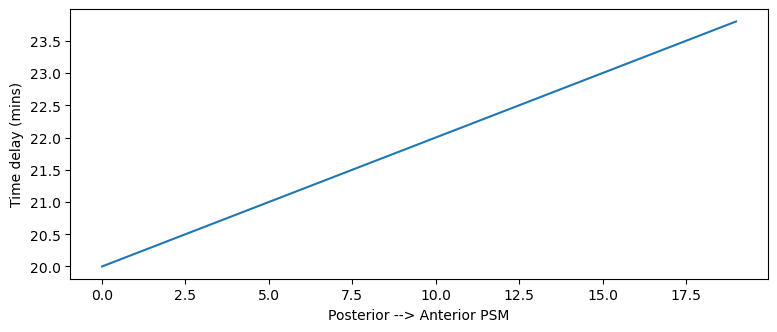

In [7]:
plt.figure(figsize=(9,3.5))
plt.plot(params.T_h)
plt.xlabel('Posterior --> Anterior PSM')
plt.ylabel('Time delay (mins)')

## Nullclines for Hes oscillations

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

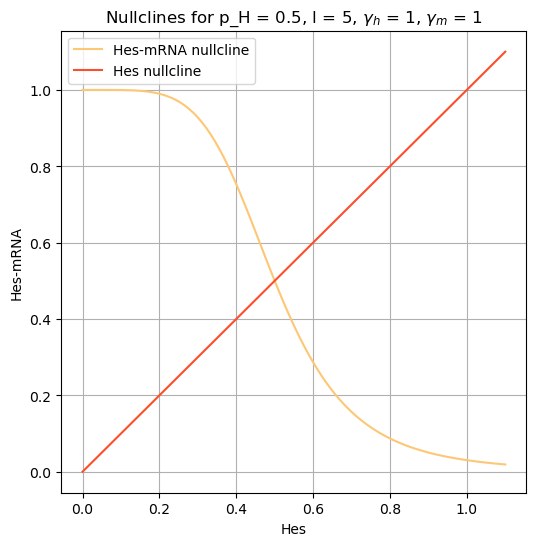

In [ ]:
def nullclines_Hes(m_h, h, p_h, l, gamma_h, gamma_m):
    """Calculate the nullclines for Hes."""
    # Hes protein nullcline
    h_null = gamma_h**(-1)*m_h
    
    # Hes mRNA nullcline
    m_h_null = gamma_m**(-1) * p_h**l / (p_h**l + h**l)

    return h_null, m_h_null

p_h = 0.5
l = 5
gamma_h = 1
gamma_m = 1

m_h_plot = np.linspace(0, 1, 100)*1.1
h_plot = np.linspace(0, 1, 100)*1.1
m_h_null_plot, h_null_plot = nullclines_Hes(m_h_plot, h_plot, p_h, l, gamma_h, gamma_m)

hescolor1 = '#fdc776'  # light
hescolor2 = '#fc4e2a'  # dark

plt.figure(figsize=(6, 6)) 
plt.plot(m_h_plot, h_null_plot, label='Hes-mRNA nullcline', color = hescolor1)
plt.plot(h_plot, m_h_null_plot, label='Hes nullcline', color = hescolor2)
plt.xlabel('Hes')
plt.ylabel('Hes-mRNA')
plt.title('Nullclines for p_H = ' + str(p_h) + ', l = ' + str(l) + ', $\gamma_h$ = ' + str(gamma_h) + ', $\gamma_m$ = ' + str(gamma_m))
plt.grid()
plt.legend()
plt.tight_layout